# <span style="color:purple">**CS 39AA-Project Part 3**</span>

## <span style="color:green">**Imports**</span>


In [1]:
# import all of the python modules/packages you'll need here
import pandas as pd# data processsing, CSV file I/O (e.g. pd.read_csv)
import numpy as np# linear algebra
import re
from scipy.stats import norm
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter
import warnings
warnings.simplefilter("ignore")
# filter warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


# import the dataset 
data_URL = "../input/language-identification-datasst/dataset.csv"
df = pd.read_csv(data_URL)#dataset with 22 languages
print(f"df.shape: {df.shape}")
#A change in the default display width for a pandas dataframe column
pd.set_option("display.max_colwidth", 240)
df

/kaggle/input/language-identification-datasst/dataset.csv
df.shape: (22000, 2)


,Text,language
0,klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn...,Estonian
1,sebes joseph pereira thomas på eng the jesuits and the sino-russian treaty of nerchinsk the diary of thomas pereira bibliotheca instituti historici s i -- rome libris,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้นที่เขตพระนคร เขตป้อมปราบศัตรูพ่าย เขตสัมพันธวงศ์ เขตบางรัก เขตสาทร ...,Thai
3,"விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திரிகை-விசாகப்பட்டின ஆசிரியர் சம்பத்துடன் இணைந்து விரிவுபடுத்தினார் ஆண்டுகள் தொடர்ந்து செயலராக இருந்து தமிழ்மன்றத்தை நடத்திச் சென்றார் கோவை செம்மொழி மாநாட்டில் ""தமிழ்ச்சங்கங்களும் தமிழும்"" என...",Tamil
4,de spons behoort tot het geslacht haliclona en behoort tot de familie chalinidae de wetenschappelijke naam van de soort werd voor het eerst geldig gepubliceerd in door kudelin,Dutch
...,...,...
21995,hors du terrain les années et sont des années de crise pour le championnat le titre de champion de france attise les convoitises et entraîne des dérives violence sur les terrains et accusations d’amateurisme marron rythment de plus e...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเดียทรงได้พบอดียรองกงสุลอังกฤษ นายเฮนรี่ อลาบาสเตอร์ ได้กราบบังคมทูลถวายคำแนะนำในสำรวจและทำแผนที่ จึงได้ทรงพระกรุณาโปรดเกล้าฯ ให้ตั้งกองทำแผนที่ทดลอง ใน พศ,Thai
21997,con motivo de la celebración del septuagésimoquinto ° aniversario de la fundación del departamento en guillermo ceballos espinosa presentó a la gobernación de caldas por encargo de su titular dilia estrada de gómez el himno que fue ado...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由美國的獨立廠牌bip·record發行，以外國輸入盤的形式在日本發售，旋即被抢购一空。其後於月日發行以倉木麻衣名義發行的首張日文單曲《love day after tomorrow》，正式於日本出道。這張單曲初動銷量只得約萬張，可是其後每週銷量一直上升，並於年月正式突破百萬銷量，合计万张。成為年最耀眼的新人歌手。,Chinese


## <span style="color:green">**Data cleanup**</span>
Better Tokenization

In [2]:
#Let's convert the 'Text' column to string format in case there is some data not in string format.
df['Text']= df['Text'].astype(str)

#Let's delete any row that might have missing text
df=df[~df['Text'].isnull()]

#This removes any characters that are not letters or numbers
df['preprocessed_text'] = df['Text'].str.replace('\W',' ') 

#Convert to lower case
df['preprocessed_text'] = df['preprocessed_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Remove numbers
df['preprocessed_text'] = df['preprocessed_text'].str.replace('\d+','')

#Remove duplicate text
df.drop_duplicates(subset=['Text'],keep='first',inplace=True)

In [3]:
#Create tokens
from nltk.tokenize import word_tokenize
df['tokens'] = df['preprocessed_text'].apply(lambda x: word_tokenize(x.lower()))
df.head()

,Text,language,preprocessed_text,tokens
0,klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn...,Estonian,klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn ...,"[klement, gottwaldi, surnukeha, palsameeriti, ning, paigutati, mausoleumi, surnukeha, oli, aga, liiga, hilja, ja, oskamatult, palsameeritud, ning, hakkas, ilmutama, lagunemise, tundemärke, aastal, viidi, ta, surnukeha, mausoleumist, ära..."
1,sebes joseph pereira thomas på eng the jesuits and the sino-russian treaty of nerchinsk the diary of thomas pereira bibliotheca instituti historici s i -- rome libris,Swedish,sebes joseph pereira thomas på eng the jesuits and the sino russian treaty of nerchinsk the diary of thomas pereira bibliotheca instituti historici s i rome libris,"[sebes, joseph, pereira, thomas, på, eng, the, jesuits, and, the, sino, russian, treaty, of, nerchinsk, the, diary, of, thomas, pereira, bibliotheca, instituti, historici, s, i, rome, libris]"
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้นที่เขตพระนคร เขตป้อมปราบศัตรูพ่าย เขตสัมพันธวงศ์ เขตบางรัก เขตสาทร ...,Thai,ถนนเจร ญกร ง อ กษรโรม น thanon charoen krung เร มต งแต ถนนสนามไชยถ งแม น ำเจ าพระยาท ถนนตก กร งเทพมหานคร เป นถนนร นแรกท ใช เทคน คการสร างแบบตะว นตก ป จจ บ นผ านพ นท เขตพระนคร เขตป อมปราบศ ตร พ าย เขตส มพ นธวงศ เขตบางร ก เขตสาทร และเขตบา...,"[ถนนเจร, ญกร, ง, อ, กษรโรม, น, thanon, charoen, krung, เร, มต, งแต, ถนนสนามไชยถ, งแม, น, ำเจ, าพระยาท, ถนนตก, กร, งเทพมหานคร, เป, นถนนร, นแรกท, ใช, เทคน, คการสร, างแบบตะว, นตก, ป, จจ, บ, นผ, านพ, นท, เขตพระนคร, เขตป, อมปราบศ, ตร, พ, าย,..."
3,"விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திரிகை-விசாகப்பட்டின ஆசிரியர் சம்பத்துடன் இணைந்து விரிவுபடுத்தினார் ஆண்டுகள் தொடர்ந்து செயலராக இருந்து தமிழ்மன்றத்தை நடத்திச் சென்றார் கோவை செம்மொழி மாநாட்டில் ""தமிழ்ச்சங்கங்களும் தமிழும்"" என...",Tamil,வ ச கப பட ட னம தம ழ ச சங கத த இந த ப பத த ர க வ ச கப பட ட ன ஆச ர யர சம பத த டன இண ந த வ ர வ பட த த ன ர ஆண ட கள த டர ந த ச யலர க இர ந த தம ழ மன றத த நடத த ச ச ன ற ர க வ ச ம ம ழ ம ந ட ட ல தம ழ ச சங கங கள ம தம ழ ம என ம தல ப ப ல ப ற ம ந லங ...,"[வ, ச, கப, பட, ட, னம, தம, ழ, ச, சங, கத, த, இந, த, ப, பத, த, ர, க, வ, ச, கப, பட, ட, ன, ஆச, ர, யர, சம, பத, த, டன, இண, ந, த, வ, ர, வ, பட, த, த, ன, ர, ஆண, ட, கள, த, டர, ந, த, ச, யலர, க, இர, ந, த, தம, ழ, மன, றத, த, நடத, த, ச, ச, ன, ற, ர, க, ..."
4,de spons behoort tot het geslacht haliclona en behoort tot de familie chalinidae de wetenschappelijke naam van de soort werd voor het eerst geldig gepubliceerd in door kudelin,Dutch,de spons behoort tot het geslacht haliclona en behoort tot de familie chalinidae de wetenschappelijke naam van de soort werd voor het eerst geldig gepubliceerd in door kudelin,"[de, spons, behoort, tot, het, geslacht, haliclona, en, behoort, tot, de, familie, chalinidae, de, wetenschappelijke, naam, van, de, soort, werd, voor, het, eerst, geldig, gepubliceerd, in, door, kudelin]"


## <span style="color:green">**Training & Test subsets**</span>


In [4]:
# before we do the prediction let's split the dataset into validation and training subsets
import random
random.seed(42)

df_full = df.copy()
assert df_full.shape[0] == 21859

indices = list(range(df_full.shape[0]))

random.shuffle(indices)

train_indices = indices[:17500]
test_indices = indices[17500:]

# df will be the in-sample training dataset
df = df_full.iloc[train_indices,:].copy()
print(f"df.shape: {df.shape}")

# df_test will be the out-of-sample validation dataset
df_test = df_full.iloc[test_indices,:].copy()
print(f"df_test.shape: {df_test.shape}")
df_test.head()


df.shape: (17500, 4)
df_test.shape: (4359, 4)


,Text,language,preprocessed_text,tokens
21705,en septiembre de lideró al equipo nacional mexicano para clasificar por primera vez en años al campeonato mundial de baloncesto el equipo ganó la medalla de oro del torneo fiba américas y ayón fue nombrado jugador más valioso del torneo,Spanish,en septiembre de lideró al equipo nacional mexicano para clasificar por primera vez en años al campeonato mundial de baloncesto el equipo ganó la medalla de oro del torneo fiba américas y ayón fue nombrado jugador más valioso del torneo,"[en, septiembre, de, lideró, al, equipo, nacional, mexicano, para, clasificar, por, primera, vez, en, años, al, campeonato, mundial, de, baloncesto, el, equipo, ganó, la, medalla, de, oro, del, torneo, fiba, américas, y, ayón, fue, nomb..."
15369,علم أحوال التربة أو البيدولوجيا بالإنجليزية pedology هو المسار العلمي المعني بجميع جوانب التربة بما في ذلك خصائصها الفيزيائية والكيميائية ودور الكائنات الحية في إنتاج وخصائص التربة ووصف ورسم الخرائط وحدات التربة ومنشأ وتكوين التربة وفقا...,Arabic,علم أحوال التربة أو البيدولوجيا بالإنجليزية pedology هو المسار العلمي المعني بجميع جوانب التربة بما في ذلك خصائصها الفيزيائية والكيميائية ودور الكائنات الحية في إنتاج وخصائص التربة ووصف ورسم الخرائط وحدات التربة ومنشأ وتكوين التربة وفقا...,"[علم, أحوال, التربة, أو, البيدولوجيا, بالإنجليزية, pedology, هو, المسار, العلمي, المعني, بجميع, جوانب, التربة, بما, في, ذلك, خصائصها, الفيزيائية, والكيميائية, ودور, الكائنات, الحية, في, إنتاج, وخصائص, التربة, ووصف, ورسم, الخرائط, وحدات,..."
10889,충청도 괴산에서 출생하여 한성부에서 성장한 그는 · 광복 이후 이승만의 비서 국방부 장관 서울특별시 시장 국회의장직을 역임하였다 조선 태종의 차자次子인 효령대군 이보李補의 대손으로 흥선대원군의 측근이었다가 임오군란에 연루되어 처형된 이회정의 증손이었다 본관은 전주全州이고 충청도 괴산군 출생이며 한성부에서 성장하였다,Korean,충청도 괴산에서 출생하여 한성부에서 성장한 그는 광복 이후 이승만의 비서 국방부 장관 서울특별시 시장 국회의장직을 역임하였다 조선 태종의 차자次子인 효령대군 이보李補의 대손으로 흥선대원군의 측근이었다가 임오군란에 연루되어 처형된 이회정의 증손이었다 본관은 전주全州이고 충청도 괴산군 출생이며 한성부에서 성장하였다,"[충청도, 괴산에서, 출생하여, 한성부에서, 성장한, 그는, 광복, 이후, 이승만의, 비서, 국방부, 장관, 서울특별시, 시장, 국회의장직을, 역임하였다, 조선, 태종의, 차자次子인, 효령대군, 이보李補의, 대손으로, 흥선대원군의, 측근이었다가, 임오군란에, 연루되어, 처형된, 이회정의, 증손이었다, 본관은, 전주全州이고, 충청도, 괴산군, 출생이며, 한성부에서, 성장하였다]"
184,« une mise en scène efficace et quelques scènes dures servent le propos de ce film regard moderne sur une société où la soumission exigée des femmes va croissant »,French,une mise en scène efficace et quelques scènes dures servent le propos de ce film regard moderne sur une société où la soumission exigée des femmes va croissant,"[une, mise, en, scène, efficace, et, quelques, scènes, dures, servent, le, propos, de, ce, film, regard, moderne, sur, une, société, où, la, soumission, exigée, des, femmes, va, croissant]"
8397,நிதி நிறுவனங்களின் நிதி நெருக்கடி காலத்தில் அதனை எதிர்கொள்வதற்கு தேவையான வழிவகைகளை ஏற்படுத்துவதுடன் போதிய பாதுகாப்பு நடவடிக்கைகளையும் உறுதிப்படுத்தி பொருளாதாரத்துக்கு நிதி நிலைத்தன்மையை ஏற்படுத்த உதவுகிறது,Tamil,ந த ந ற வனங கள ன ந த ந ர க கட க லத த ல அதன எத ர க ள வதற க த வ ய ன வழ வக கள ஏற பட த த வத டன ப த ய ப த க ப ப நடவட க க கள ய ம உற த ப பட த த ப ர ள த ரத த க க ந த ந ல த தன ம ய ஏற பட த த உதவ க றத,"[ந, த, ந, ற, வனங, கள, ன, ந, த, ந, ர, க, கட, க, லத, த, ல, அதன, எத, ர, க, ள, வதற, க, த, வ, ய, ன, வழ, வக, கள, ஏற, பட, த, த, வத, டன, ப, த, ய, ப, த, க, ப, ப, நடவட, க, க, கள, ய, ம, உற, த, ப, பட, த, த, ப, ர, ள, த, ரத, த, க, க, ந, த, ந, ல, த, த..."


In [5]:
# put labels into y_train variable
y_train = df["language"]
# Drop 'label' column
X_train = df.drop(labels = ["language"],axis = 1)

Thai          812
Romanian      812
Swedish       811
Arabic        810
Turkish       810
Japanese      808
Tamil         805
Dutch         804
Korean        804
Russian       802
Persian       798
English       797
Chinese       796
Estonian      794
Urdu          794
Spanish       791
Indonesian    786
Pushto        784
French        783
Portugese     779
Hindi         778
Latin         742
Name: language, dtype: int64

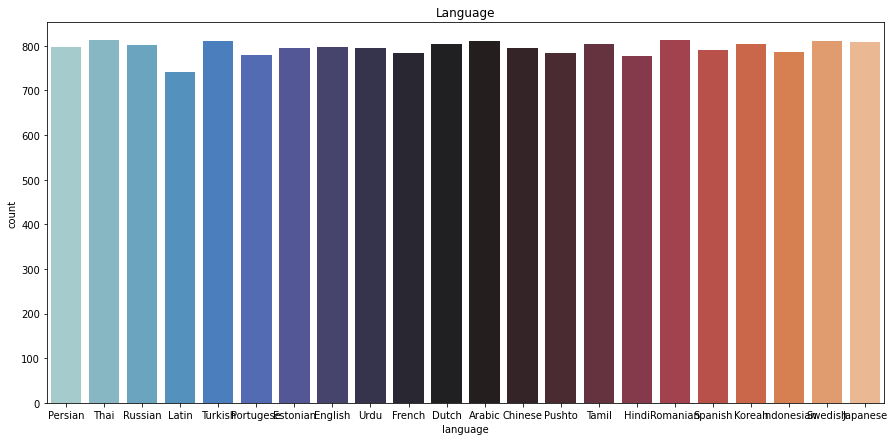

In [6]:
# visualize number of languages classes
plt.figure(figsize=(15,7))
g = sns.countplot(y_train, palette="icefire")
plt.title("Language")
y_train.value_counts()

In [7]:
df['textclean'] = df['tokens'].apply(lambda x: ' '.join(x))
df.head()

,Text,language,preprocessed_text,tokens,textclean
2583,کنگو در برابر فرانسه که در آن جمهوری دموکراتیک کنگو فرانسه را به بازداشت غیرقانونی روسای ایالتی کنگو و جرائم جنگی متهم نمود؛ و دعوی نیکاراگوئه در برابر ایالات متحده که در این دعوی نیکاراگوئه ایالات متحده را متهم نمود که نیروهای معارض حک...,Persian,کنگو در برابر فرانسه که در آن جمهوری دموکراتیک کنگو فرانسه را به بازداشت غیرقانونی روسای ایالتی کنگو و جرائم جنگی متهم نمود و دعوی نیکاراگوئه در برابر ایالات متحده که در این دعوی نیکاراگوئه ایالات متحده را متهم نمود که نیروهای معارض حکو...,"[کنگو, در, برابر, فرانسه, که, در, آن, جمهوری, دموکراتیک, کنگو, فرانسه, را, به, بازداشت, غیرقانونی, روسای, ایالتی, کنگو, و, جرائم, جنگی, متهم, نمود, و, دعوی, نیکاراگوئه, در, برابر, ایالات, متحده, که, در, این, دعوی, نیکاراگوئه, ایالات, مت...",کنگو در برابر فرانسه که در آن جمهوری دموکراتیک کنگو فرانسه را به بازداشت غیرقانونی روسای ایالتی کنگو و جرائم جنگی متهم نمود و دعوی نیکاراگوئه در برابر ایالات متحده که در این دعوی نیکاراگوئه ایالات متحده را متهم نمود که نیروهای معارض حکو...
18665,เต้าหู้ยี้มีชื่อเรียกในภาษาจีนหลายชื่อ เช่น เต้าฟูรู โทฟูรู ทูซูฟู ซูฟู sufu และ ต้าวยู่ 豆乳สำเนียงฮกเกี้ยน เป็นต้น ซึ่งคำว่า ซูฟู หมายถึงก้อนที่มีราขึ้น milk mold ราชนิดนี้เป็นราที่กินได้ เต้าหู้ยี้ยังมีชื่อเรียกในภาษาอังกฤษอีกชื่อหนึ่ง...,Thai,เต าห ย ม ช อเร ยกในภาษาจ นหลายช อ เช น เต าฟ ร โทฟ ร ท ซ ฟ ซ ฟ sufu และ ต าวย 豆乳สำเน ยงฮกเก ยน เป นต น ซ งคำว า ซ ฟ หมายถ งก อนท ม ราข น milk mold ราชน ดน เป นราท ก นได เต าห ย ย งม ช อเร ยกในภาษาอ งกฤษอ กช อหน งว า chinese cheese,"[เต, าห, ย, ม, ช, อเร, ยกในภาษาจ, นหลายช, อ, เช, น, เต, าฟ, ร, โทฟ, ร, ท, ซ, ฟ, ซ, ฟ, sufu, และ, ต, าวย, 豆乳สำเน, ยงฮกเก, ยน, เป, นต, น, ซ, งคำว, า, ซ, ฟ, หมายถ, งก, อนท, ม, ราข, น, milk, mold, ราชน, ดน, เป, นราท, ก, นได, เต, าห, ย, ย, ง...",เต าห ย ม ช อเร ยกในภาษาจ นหลายช อ เช น เต าฟ ร โทฟ ร ท ซ ฟ ซ ฟ sufu และ ต าวย 豆乳สำเน ยงฮกเก ยน เป นต น ซ งคำว า ซ ฟ หมายถ งก อนท ม ราข น milk mold ราชน ดน เป นราท ก นได เต าห ย ย งม ช อเร ยกในภาษาอ งกฤษอ กช อหน งว า chinese cheese
14720,создал ряд работ для храмов иконы христа спасителя и божией матери для церкви в с красное имение г стобеуса образ христа восседающего на престоле для церкви в городе тверь а также изображение божией матери в медальоне на кости — для под...,Russian,создал ряд работ для храмов иконы христа спасителя и божией матери для церкви в с красное имение г стобеуса образ христа восседающего на престоле для церкви в городе тверь а также изображение божией матери в медальоне на кости для подне...,"[создал, ряд, работ, для, храмов, иконы, христа, спасителя, и, божией, матери, для, церкви, в, с, красное, имение, г, стобеуса, образ, христа, восседающего, на, престоле, для, церкви, в, городе, тверь, а, также, изображение, божией, мат...",создал ряд работ для храмов иконы христа спасителя и божией матери для церкви в с красное имение г стобеуса образ христа восседающего на престоле для церкви в городе тверь а также изображение божией матери в медальоне на кости для подне...
18209,"""lapita cultural complex"" lapita designs texts about lapita lapitadraw ""software to aid in studying archaeological ceramic artefacts"" archéologie et informatique francice",Latin,lapita cultural complex lapita designs texts about lapita lapitadraw software to aid in studying archaeological ceramic artefacts archéologie et informatique francice,"[lapita, cultural, complex, lapita, designs, texts, about, lapita, lapitadraw, software, to, aid, in, studying, archaeological, ceramic, artefacts, archéologie, et, informatique, francice]",lapita cultural complex lapita designs texts about lapita lapitadraw software to aid in studying archaeological ceramic artefacts archéologie et informatique francice
13099,sanayide monoklorasetik asit mca olarak bilinen kloroasetik asit formülü clchcoh olan organik klorlu bileşiktir bu karboksilik asit organik sentezlerde kullanılan temel bir yapıtaşıdır,Turkish,sanayide monoklorasetik asit mca olarak bilinen kloroasetik asit formülü clchcoh olan organik klorlu bileşiktir bu karboksilik as

## <span style="color:green">**Vectorization**</span>


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
#import seaborn as sns
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(df['textclean']).toarray()
#X_train = tfidf_vectorizer.fit_transform(df['text']).toarray() # original tweet text (without our manual tokenization)

#from sklearn.feature_extraction.text import CountVectorizer
#one_hot_vectorizer = CountVectorizer(binary=True)
#tweet_matrix = one_hot_vectorizer.fit_transform(list(df['textclean']))#.toarray()

print(f"X_train.shape = {X_train.shape}")
type(X_train)

X_train.shape = (17500, 236786)


numpy.ndarray

In [9]:
y_train = df.language.to_numpy()


In [10]:
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1)
#print("x_train shape",X_train.shape)
#print("x_test shape",X_val.shape)
#print("y_train shape",y_train.shape)
#print("y_test shape",y_val.shape)
df_test['textclean'] = df_test['tokens'].apply(lambda x: ' '.join(x))
X_test = tfidf_vectorizer.transform(df_test['textclean']).toarray()
X_test.shape


(4359, 236786)

## <span style="color:green">**Create Model**</span>


In [11]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
#from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

2022-12-04 08:54:05.854976: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [12]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [13]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [14]:
epochs = 10  # for better result increase the epochs
batch_size = 250

In [15]:
# Import libraries
try:
  import textaugment
except ModuleNotFoundError:
  !pip install textaugment
  import textaugment

import pandas as pd

import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.datasets import imdb

from textaugment import MIXUP
%matplotlib inline


  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 438.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15735 sha256=d6079f6717d126de3ad213681b729b0c6a468498dcc8f89f2d4c2d6a4ead6446
  Stored in directory: /root/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14

In [16]:
tf.__version__

'2.6.4'

In [17]:
textaugment.__version__

'1.3.4'

In [18]:
# set parameters:
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 10
runs = 1

In [19]:
print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)


Loading data...
17473536/17464789 [==============================] - 1s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 400)
x_test shape: (25000, 400)


In [20]:
mixup = MIXUP()
generator, step = mixup.flow(X_train, y_train, batch_size=batch_size, runs=runs)


In [21]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 50)           250000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 400, 50)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_4 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250

## <span style="color:green">**Fit the model**</span>


In [22]:
h1 = model.fit(generator, steps_per_epoch=step,
          epochs=epochs,
          validation_data=(X_test, y_test))


2022-12-04 08:54:28.292389: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
782/782 [==============================] - 46s 57ms/step - loss: 0.6846 - accuracy: 0.2872 - val_loss: 0.6628 - val_accuracy: 0.5896
Epoch 2/10
782/782 [==============================] - 45s 57ms/step - loss: 0.6609 - accuracy: 0.3165 - val_loss: 0.6007 - val_accuracy: 0.6976
Epoch 3/10
782/782 [==============================] - 45s 58ms/step - loss: 0.6446 - accuracy: 0.3254 - val_loss: 0.5413 - val_accuracy: 0.7331
Epoch 4/10
782/782 [==============================] - 45s 57ms/step - loss: 0.6284 - accuracy: 0.3290 - val_loss: 0.5098 - val_accuracy: 0.7510
Epoch 5/10
782/782 [==============================] - 45s 58ms/step - loss: 0.6154 - accuracy: 0.3288 - val_loss: 0.5248 - val_accuracy: 0.7312
Epoch 6/10
782/782 [==============================] - 45s 57ms/step - loss: 0.6036 - accuracy: 0.3366 - val_loss: 0.4712 - val_accuracy: 0.7768
Epoch 7/10
782/782 [==============================] - 45s 58ms/step - loss: 0.5992 - accuracy: 0.3323 - val_loss: 0.4479 - val_accuracy:

## <span style="color:green">**Evaluate the model**</span>


<AxesSubplot:title={'center':'With mixup'}, xlabel='Number of Epochs', ylabel='Loss'>

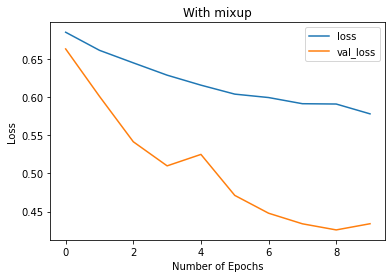

In [23]:
pd.DataFrame(h1.history)[['loss','val_loss']].plot(title="With mixup", xlabel='Number of Epochs',ylabel='Loss')


In [24]:
print('Build model...')
model2 = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model2.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model2.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model2.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model2.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model2.add(Dense(hidden_dims))
model2.add(Dropout(0.2))
model2.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model2.add(Dense(1))
model2.add(Activation('sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model2.summary()



Build model...
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 50)           250000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 400, 50)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_6 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250

In [25]:
h2 = model2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test))


Epoch 1/10
782/782 [==============================] - 46s 58ms/step - loss: 0.4114 - accuracy: 0.7957 - val_loss: 0.2801 - val_accuracy: 0.8826
Epoch 2/10
782/782 [==============================] - 45s 58ms/step - loss: 0.2352 - accuracy: 0.9056 - val_loss: 0.2572 - val_accuracy: 0.8942
Epoch 3/10
782/782 [==============================] - 45s 58ms/step - loss: 0.1670 - accuracy: 0.9372 - val_loss: 0.2752 - val_accuracy: 0.8913
Epoch 4/10
782/782 [==============================] - 45s 58ms/step - loss: 0.1164 - accuracy: 0.9575 - val_loss: 0.4108 - val_accuracy: 0.8584
Epoch 5/10
782/782 [==============================] - 45s 57ms/step - loss: 0.0808 - accuracy: 0.9710 - val_loss: 0.3377 - val_accuracy: 0.8877
Epoch 6/10
782/782 [==============================] - 45s 58ms/step - loss: 0.0584 - accuracy: 0.9788 - val_loss: 0.3896 - val_accuracy: 0.8856
Epoch 7/10
782/782 [==============================] - 45s 57ms/step - loss: 0.0423 - accuracy: 0.9849 - val_loss: 0.4250 - val_accuracy:

<AxesSubplot:title={'center':'Without mixup'}, xlabel='Number of Epochs', ylabel='Loss'>

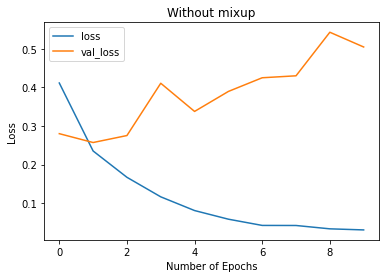

In [26]:
pd.DataFrame(h2.history)[['loss','val_loss']].plot(title="Without mixup", xlabel='Number of Epochs',ylabel='Loss')

accuracy (on X_test): 0.8830


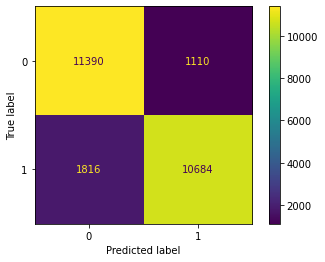

In [27]:
# confusion matrix
import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import seaborn as sns
# Predict the values from the validation dataset
y_pred = model2.predict(X_test)
# Convert predictions classes to one hot vectors 
#y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
#y_true = np.argmax(y_test,axis =0) 
# compute the confusion matrix
#confusion_mtx = confusion_matrix(y_test, y_pred) 
#confusion_mtx = sklearn.metrics.confusion_matrix(y_test, np.rint(y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, np.rint(y_pred)))
# plot the confusion matrix
#f,ax = plt.subplots(figsize=(8, 8))
#sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
#plt.xlabel("Predicted Label")
#plt.ylabel("True Label")
#plt.title("Confusion Matrix")
#plt.show()
disp.plot()
print(f"accuracy (on X_test): {accuracy_score(y_test, np.rint(y_pred)):.4f}")
